In [129]:
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt

### 1. Compare the weekly statistics (mean, median, mode) for number of new cases and deaths across US.

In [11]:
'''Reading data from files and initializing'''
#reading the data for the confirmed number of COVID cases and displaying them
confirmedCases = pd.read_csv(r"..\..\DATASETS\COVID DATASETS\covid_confirmed_usafacts.csv")

# reading the confirmed number of COVID Deaths and displaying them
confirmedDeaths = pd.read_csv(r"..\..\DATASETS\COVID DATASETS\covid_deaths_usafacts.csv")

#reading the data for the population of number of people and displaying them
populationOriginalUSA = pd.read_csv(r"..\..\DATASETS\COVID DATASETS\covid_county_population_usafacts.csv")


In [12]:
confirmedCasesNew = confirmedCases[~confirmedCases['County Name'].str.contains('Statewide Unallocated')]
confirmedDeathsNew = confirmedDeaths[~confirmedDeaths['County Name'].str.contains('Statewide Unallocated')]
populationOriginalUSANew = populationOriginalUSA[~populationOriginalUSA['County Name'].str.contains('Statewide Unallocated')]
#confirmedCasesNew

In [13]:
'''FOR NUMBER OF CASES'''
x = confirmedCasesNew.iloc[:, 4:].fillna(0)
confirmedCasesNew_integral = x.diff(axis = 1)
#confirmedCasesNJ_integral

confirmedCasesNew1 = confirmedCasesNew.iloc[:, :3]

# Delete columns outside the date range of June 1st to December 31st
confirmedCasesNew2 =  confirmedCasesNew_integral.loc[:, '2022-05-30':'2023-01-01']
confirmedCasesNew2
confirmedCasesNews = pd.concat([confirmedCasesNew1, confirmedCasesNew2], axis=1)
#confirmendCasesNJNew

ccnew =  confirmedCasesNew_integral.loc[:, '2022-05-30':'2023-01-01']
ccnewSum = ccnew.sum()
#ccnewSum
#ccnewSum.to_csv(r"C:\Users\ashdh\Documents\ccnewSum1.csv")


'''FOR NUMBER OF DEATHS'''

y = confirmedDeathsNew.iloc[:, 4:].fillna(0)
confirmedDeathsNew_integral = y.diff(axis = 1)
#confirmedDeathsNJ_integral.sum(axis =1 )

confirmedDeathsNew1 = confirmedDeathsNew.iloc[:, :3]

# Delete columns outside the date range of June 1st to December 31st
confirmedDeathsNew2 =  confirmedDeathsNew_integral.loc[:, '2022-05-30':'2023-01-01']
confirmedDeathsNew2

confirmedDeathsNews = pd.concat([confirmedDeathsNew1, confirmedDeathsNew2], axis=1)
#confirmedDeathsNJNew

cdnew =  confirmedDeathsNew_integral.loc[:, '2022-05-30':'2023-01-01']
cdnewSum = cdnew.sum()



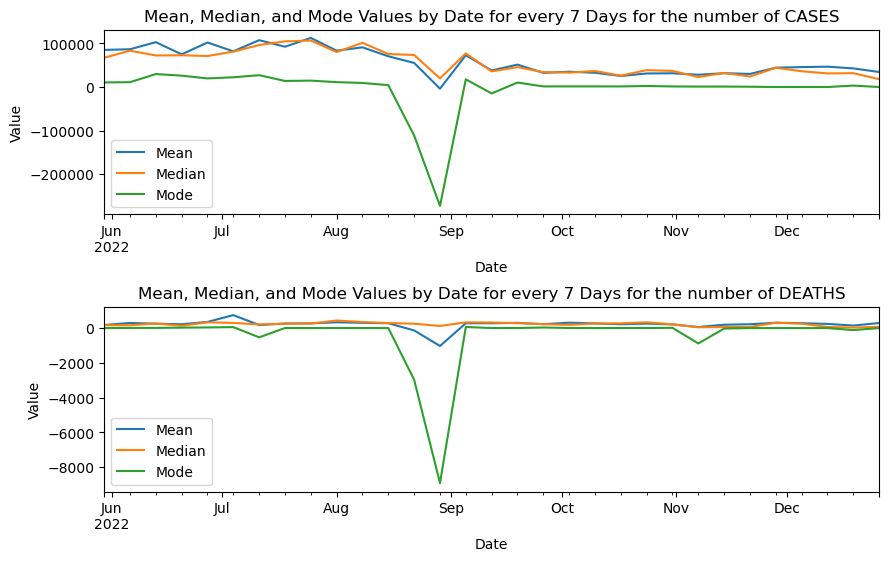

In [14]:
'''FOR NUMBER OF CASES'''
date_range = pd.date_range(start='2022-05-30', end='2023-01-01')
ccnewSum.index = date_range

ccnewSum.index = pd.to_datetime(ccnewSum.index)
#ccnj1.index = ccnj1.index.strftime('%Y-%m-%d')
ccnew_resampled = ccnewSum.resample('7D')

ccnew_resampled_mean = ccnew_resampled.mean()
ccnew_resampled_mean.columns = ['Mean']
ccnew_resampled_median = ccnew_resampled.median()
ccnew_resampled_median.columns = ['Median']
ccnew_resampled_mode = ccnew_resampled.apply(lambda mcnew: mcnew.mode().iloc[0])
#print(ccnew_resampled_mean)

'''FOR NUMBER OF DEATHS'''
date_range = pd.date_range(start='2022-05-30', end='2023-01-01')
cdnewSum.index = date_range

cdnewSum.index = pd.to_datetime(cdnewSum.index)
#ccnj1.index = ccnj1.index.strftime('%Y-%m-%d')
cdnew_resampled = cdnewSum.resample('7D')

cdnew_resampled_mean = cdnew_resampled.mean()
cdnew_resampled_mean.columns = ['Mean']
cdnew_resampled_median = cdnew_resampled.median()
cdnew_resampled_median.columns = ['Median']
cdnew_resampled_mode = cdnew_resampled.apply(lambda mdnew: mdnew.mode().iloc[0])


#PLOTTING THE DATA
# Create a new figure and axis object
fig, ax = plt.subplots(2,1, figsize=(10, 6))
# Plot the mean data as a line chart
ccnew_resampled_mean.plot(kind='line', ax=ax[0], label='Mean')
cdnew_resampled_mean.plot(kind='line', ax=ax[1], label='Mean')

# Plot the median data as a line chart
ccnew_resampled_median.plot(kind='line', ax=ax[0], label='Median')
cdnew_resampled_median.plot(kind='line', ax=ax[1], label='Median')

# Plot the ccnew_resampled_mode data as a line chart
ccnew_resampled_mode.plot(kind='line', ax=ax[0], label='Mode')
cdnew_resampled_mode.plot(kind='line', ax=ax[1], label='Mode')

# Set the axis labels and title
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Value')
ax[0].set_title('Mean, Median, and Mode Values by Date for every 7 Days for the number of CASES')

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Value')
ax[1].set_title('Mean, Median, and Mode Values by Date for every 7 Days for the number of DEATHS')

# Add a legend to the plot
ax[0].legend()
ax[1].legend()

#adding padding between the graphs
fig.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()



### 2. Calculate mean (rounded to integer value) number of new cases/deaths per week and then calculate basic statistics (mean, median, mode) on that data.

In [15]:
#GET THE MEAN OF EVERY 7 DAYS FROM THE ABOVE CODE IN THE VARIABLES THAT WERE PRESENT

#ccnew_resampled_mean
#cdnew_resampled_mean

In [73]:
#CALCULATING THE BASIC STATISTICS OF MEAN MEDIAN AND MODE ON THE ABOVE
'''NUMBER OF CASES'''
confirmedCasesMeanWhole = ccnew_resampled_mean.mean()
confirmedCasesMedianWhole = ccnew_resampled_median.median()
confirmedCasesModeWhole = ccnew_resampled_mode.mode()
int(confirmedCasesMeanWhole)
int(confirmedCasesMedianWhole)
int(confirmedCasesModeWhole)

print('\033[1m' +"The Mean, Median and the mode of the mean of number of cases of weekly data is as follows: ")
print("Mean:   ", int(confirmedCasesMeanWhole))
print("Median: ", int(confirmedCasesMedianWhole))
print("Mode:   ", int(confirmedCasesModeWhole))
print("")

'''NUMBER OF DEATHS'''
confirmedDeathsMeanWhole = cdnew_resampled_mean.mean()
confirmedDeathsMedianWhole = cdnew_resampled_median.mean()
confirmedDeathsModeWhole = cdnew_resampled_mode.mean()

print('\033[1m' +"The Mean, Median and the mode of the mean of number of deaths of weekly data is as follows: ")
print("Mean:   ", int(confirmedDeathsMeanWhole))
print("Median: ", int(confirmedDeathsMedianWhole))
print("Mode:   ", int(confirmedDeathsModeWhole))


The Mean, Median and the mode of the mean of number of cases of weekly data is as follows: 
Mean:    58002
Median:  44243
Mode:    0

The Mean, Median and the mode of the mean of number of deaths of weekly data is as follows: 
Mean:    212
Median:  221
Mode:    -425


### Compare the data against other countries of the world.

Here for comparing the USA data with other countries with similar population, we are considering the following countries:
Indonesia, Pakisthan and Nigeria .

The reason we chose these 3 countries is because according to the sensex conducted (https://www.worldometers.info/world-population/) we can see that the 3 countries with a similar population base are these 3 even though they are approx a hundered million people lesser than USA

In [75]:
'''Reading data from files and initializing'''
#reading the data for the confirmed number of COVID cases and displaying them
CasesWorld = pd.read_csv(r"..\..\DATASETS\COVID DATASETS\owid-covid-data.csv")
#CasesWorld

In [74]:
#FOR CLEANING AND KEEPING ONLY THE DATA THATS REQUIRED

CasesWorldNew  = CasesWorld.loc[(CasesWorld['iso_code'] == 'PAK')| (CasesWorld['iso_code'] == 'IDN') | 
                                (CasesWorld['iso_code'] == 'NGA') | (CasesWorld['iso_code'] == 'USA'), 
                                ['iso_code','continent','location','date','new_cases', 'new_deaths', 'population',] ]

'''creating a new .CSV for the cleaned data which only consists of the required for better ease
a. countries = Indonesia, Pakistan, Nigeria 
b. columns = new_cases, new_deaths, 
'''
CasesWorldNew.to_csv(r"..\..\DATASETS\COVID DATASETS\owid-covid-data-clean.csv", index = False)
CasesWorldNew

iso_code      continent       location        date  new_cases  \
118250      IDN           Asia      Indonesia  2020-01-03        0.0   
118251      IDN           Asia      Indonesia  2020-01-04        0.0   
118252      IDN           Asia      Indonesia  2020-01-05        0.0   
118253      IDN           Asia      Indonesia  2020-01-06        0.0   
118254      IDN           Asia      Indonesia  2020-01-07        0.0   
...         ...            ...            ...         ...        ...   
277349      USA  North America  United States  2023-03-04   227828.0   
277350      USA  North America  United States  2023-03-05        NaN   
277351      USA  North America  United States  2023-03-06        NaN   
277352      USA  North America  United States  2023-03-07        NaN   
277353      USA  North America  United States  2023-03-08        NaN   

        new_deaths   population  
118250         0.0  275501344.0  
118251         0.0  275501344.0  
118252         0.0  275501344.0  
118253         0.0  275501344.0  
118254         0.0  275501344.0  
...            ...          ...  
277349      2197.0  338289856.0  
277350         NaN  338289856.0  
277351         NaN  338289856.0  
277352         NaN  338289856.0  
277353         NaN  338289856.0  

[4641 rows x 7 columns]

In [76]:
#creating variables for individual countries for better ease of understanding

CasesWorldIDN = CasesWorldNew.loc[CasesWorldNew['iso_code'] == 'IDN'] #INDONESIA
CasesWorldPAK = CasesWorldNew.loc[CasesWorldNew['iso_code'] == 'PAK'] #PAKISTHAN
CasesWorldNGA = CasesWorldNew.loc[CasesWorldNew['iso_code'] == 'NGA'] #NIGERIA
CasesWorldUSA = CasesWorldNew.loc[CasesWorldNew['iso_code'] == 'USA'] #NIGERIA

In [77]:
#Creating a date range that is required for the data and making the data into that date range
start_date = '2022-05-30'
end_date = '2023-01-01'
date_range = pd.date_range(start=start_date, end=end_date)

CasesWorldNewIDN = CasesWorldIDN[(CasesWorldIDN['date']>= start_date) & (CasesWorldIDN['date']<= end_date)]
CasesWorldNewPAK = CasesWorldPAK[(CasesWorldPAK['date']>= start_date) & (CasesWorldPAK['date']<= end_date)]
CasesWorldNewNGA = CasesWorldNGA[(CasesWorldNGA['date']>= start_date) & (CasesWorldNGA['date']<= end_date)]
CasesWorldNewUSA = CasesWorldUSA[(CasesWorldUSA['date']>= start_date) & (CasesWorldUSA['date']<= end_date)]


In [78]:
CasesWorldNewIDN.loc[:, 'date'] = pd.to_datetime(CasesWorldNewIDN['date'])
CasesWorldNewPAK.loc[:, 'date'] = pd.to_datetime(CasesWorldNewPAK['date'])
CasesWorldNewNGA.loc[:, 'date'] = pd.to_datetime(CasesWorldNewNGA['date'])
#CasesWorldNewUSA.loc[:, 'date'] = pd.to_datetime(CasesWorldNewUSA['date'])

CasesWorldNewIDN = CasesWorldNewIDN.set_index('date')
CasesWorldNewPAK = CasesWorldNewPAK.set_index('date')
CasesWorldNewNGA = CasesWorldNewNGA.set_index('date')
#CasesWorldNewUSA = CasesWorldNewUSA.set_index('date')


C:\Users\ashdh\AppData\Local\Temp\ipykernel_29932\1539505485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CasesWorldNewIDN.loc[:, 'date'] = pd.to_datetime(CasesWorldNewIDN['date'])
C:\Users\ashdh\AppData\Local\Temp\ipykernel_29932\1539505485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CasesWorldNewPAK.loc[:, 'date'] = pd.to_datetime(CasesWorldNewPAK['date'])
C:\Users\ashdh\AppData\Local\Temp\ipykernel_29932\1539505485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

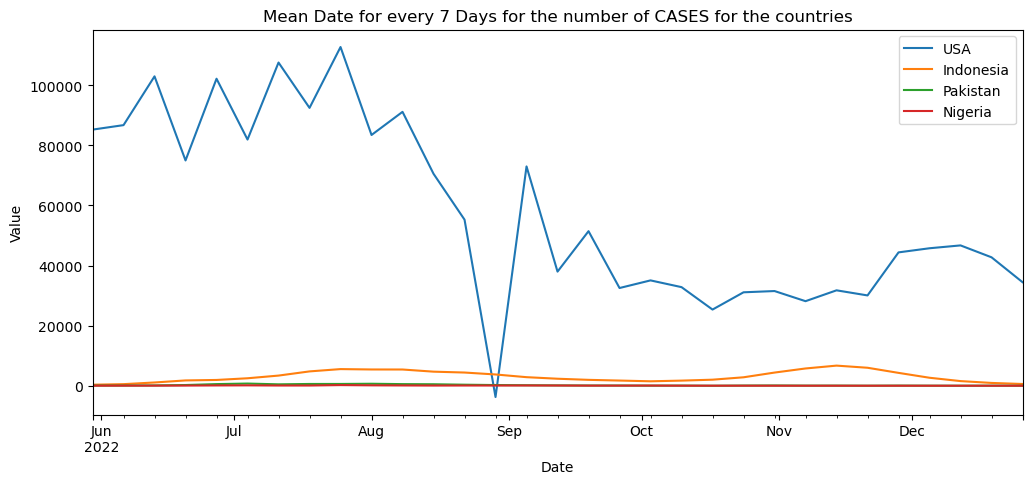

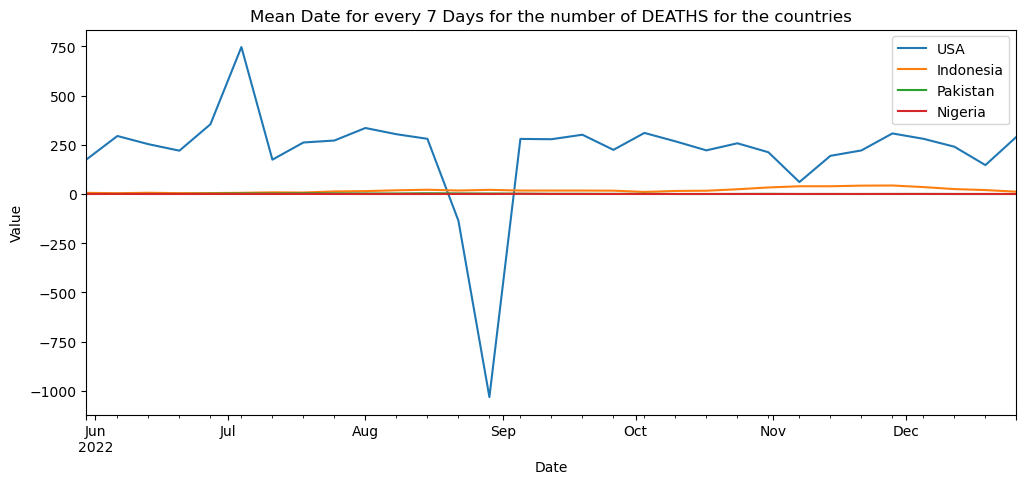

In [79]:
#CREATING RESAMPLED DATA FOR 7DAYS
'''NUMBER OF CASES'''
CasesWorldNewResampledIDN = CasesWorldNewIDN['new_cases'].resample('7D')
CasesWorldNewResampledPAK = CasesWorldNewPAK['new_cases'].resample('7D')
CasesWorldNewResampledNGA = CasesWorldNewNGA['new_cases'].resample('7D')

'''NUMBER OF DEATHS'''
CasesWorldNewDeathsResampledIDN = CasesWorldNewIDN['new_deaths'].resample('7D')
CasesWorldNewDeathsResampledPAK = CasesWorldNewPAK['new_deaths'].resample('7D')
CasesWorldNewDeathsResampledNGA = CasesWorldNewNGA['new_deaths'].resample('7D')


'''NUMBER OF CASES'''
weeklyCasesMeanIDN = CasesWorldNewResampledIDN.mean()
weeklyCasesMeanPAK = CasesWorldNewResampledPAK.mean()
weeklyCasesMeanNGA = CasesWorldNewResampledNGA.mean()
#weeklyCasesMeanUSA = CasesWorldNewUSA['new_cases'].resample('7D').mean()

#print(weeklyMeanPAK)

#PLOTTING THE DATA
# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the mean,median and mode for the number of cases ax[0] data as a line chart

ccnew_resampled_mean.plot(kind='line', ax=ax, label='USA')
weeklyCasesMeanIDN.plot(kind='line', ax=ax, label='Indonesia')
weeklyCasesMeanPAK.plot(kind='line', ax=ax, label='Pakistan')
weeklyCasesMeanNGA.plot(kind='line', ax=ax, label='Nigeria')


# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Mean Date for every 7 Days for the number of CASES for the countries')

# Add a legend to the plot
ax.legend()
#ax[1].legend()

# Show the plot
plt.show()


'''NUMBER OF DEATHS'''
weeklyDeathsMeanIDN = CasesWorldNewDeathsResampledIDN.mean()
weeklyDeathsMeanPAK = CasesWorldNewDeathsResampledPAK.mean()
weeklyDeathsMeanNGA = CasesWorldNewDeathsResampledNGA.mean()
#weeklyDeathsMeanUSA = CasesWorldNewUSA['new_deaths'].resample('7D').mean()

#print(weeklyMeanPAK)

#PLOTTING THE DATA
# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the mean,median and mode for the number of cases ax[0] data as a line chart

cdnew_resampled_mean.plot(kind='line', ax=ax, label='USA')
weeklyDeathsMeanIDN.plot(kind='line', ax=ax, label='Indonesia')
weeklyDeathsMeanPAK.plot(kind='line', ax=ax, label='Pakistan')
weeklyDeathsMeanNGA.plot(kind='line', ax=ax, label='Nigeria')


# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Mean Date for every 7 Days for the number of DEATHS for the countries')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


### 3. Plot weekly trends (cases and deaths) of US and compare to other countries. Utilize aggregrate, normalized by population (ex: number of cases per 100,000), difference in new cases, and log normalized values.

In [80]:
#GETTING THE POPULATION OF ALL THE COUNTRIES THAT ARE CONSIDERED
populationIDN = CasesWorldNewIDN['population'][0]
populationPAK = CasesWorldNewPAK['population'][0]
populationNGA = CasesWorldNewNGA['population'][0]
populationUSA = populationOriginalUSANew['population'].sum()

#NORMALIZING FACTORS
'''NUMBER OF CASES'''
normalizeCasesIDN = (CasesWorldNewIDN['new_cases'] / populationIDN) * 100000
normalizeCasesPAK = (CasesWorldNewPAK['new_cases'] / populationPAK) * 100000
normalizeCasesNGA = (CasesWorldNewNGA['new_cases'] / populationNGA) * 100000
normalizeCasesUSA = (ccnewSum / populationUSA)*100000

'''NUMBER OF DEATHS'''
normalizeDeathsIDN = (CasesWorldNewIDN['new_deaths'] / populationIDN) * 100000
normalizeDeathsPAK = (CasesWorldNewPAK['new_deaths'] / populationPAK) * 100000
normalizeDeathsNGA = (CasesWorldNewNGA['new_deaths'] / populationNGA) * 100000
normalizeDeathsUSA = (cdnewSum / populationUSA)*100000



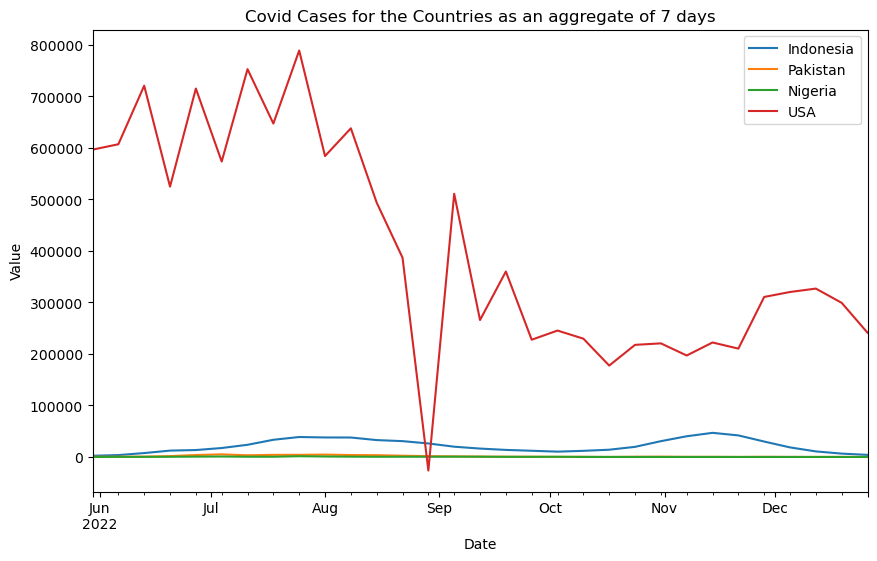

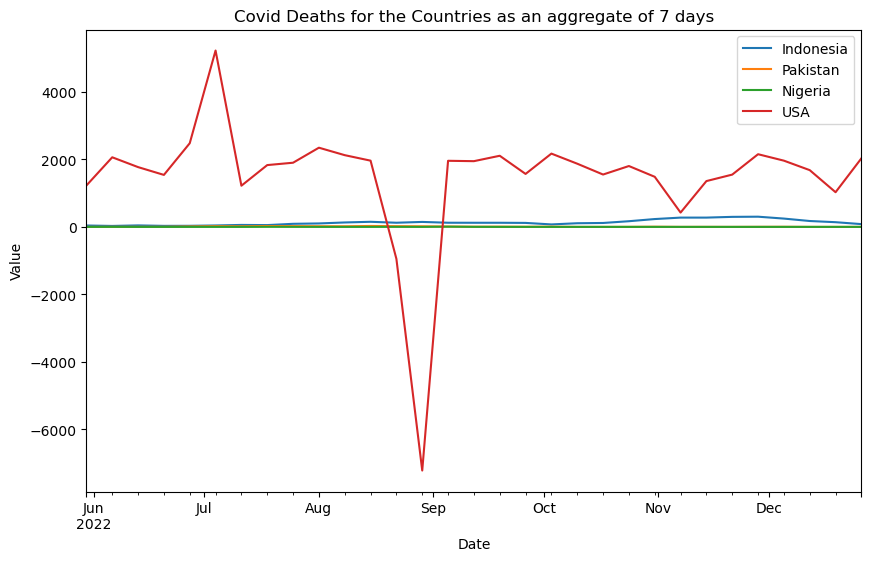

In [87]:
#PLOTTING WEEKLY AGGREGATE DATA 
'''NUMBER OF CASES'''
# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean data as a line chart
CasesWorldNewResampledIDN.sum().plot(kind='line', ax=ax ,label='Indonesia')
CasesWorldNewResampledPAK.sum().plot(kind='line', ax=ax ,label='Pakistan' )
CasesWorldNewResampledNGA.sum().plot(kind='line', ax=ax ,label='Nigeria')
ccnew_resampled.sum().plot(kind='line', ax=ax ,label='USA')


ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Covid Cases for the Countries as an aggregate of 7 days')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

'''NUMBER OF DEATHS'''

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean data as a line chart
CasesWorldNewDeathsResampledIDN.sum().plot(kind='line', ax=ax ,label='Indonesia')
CasesWorldNewDeathsResampledPAK.sum().plot(kind='line', ax=ax ,label='Pakistan' )
CasesWorldNewDeathsResampledNGA.sum().plot(kind='line', ax=ax ,label='Nigeria')
cdnew_resampled.sum().plot(kind='line', ax=ax ,label='USA')


ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Covid Deaths for the Countries as an aggregate of 7 days')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


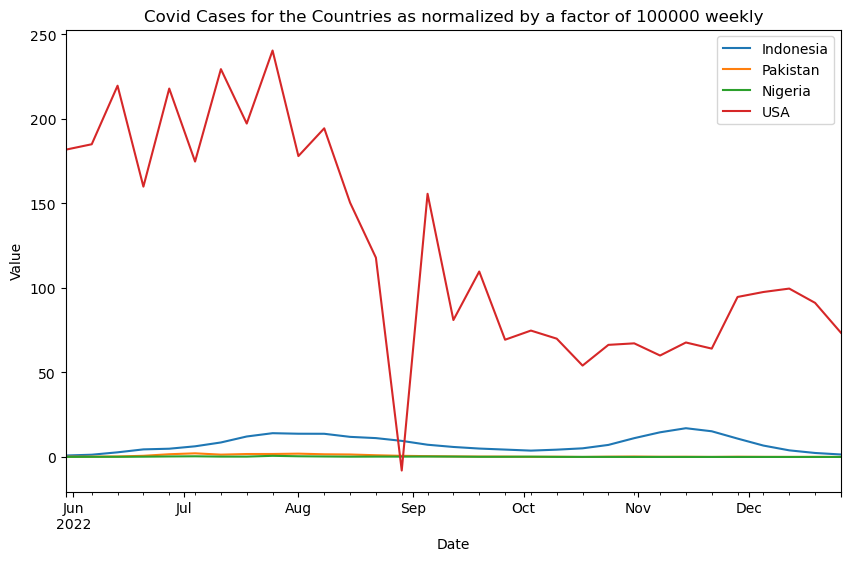

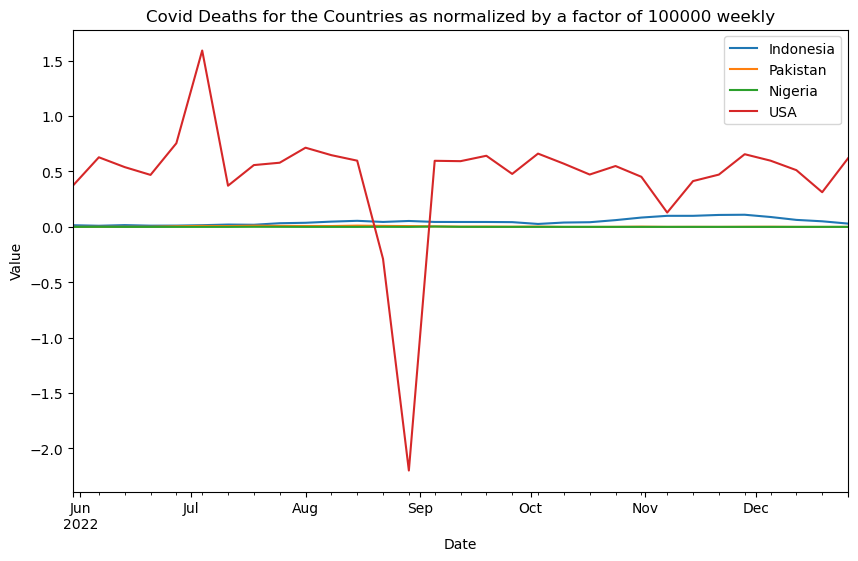

In [86]:
#PLOTTING WEEKLY FOR NORMALIZED VALUES

'''NUMBER OF CASES'''
# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean data as a line chart
normalizeCasesIDN.resample('7D').sum().plot(kind='line', ax=ax ,label='Indonesia')
normalizeCasesPAK.resample('7D').sum().plot(kind='line', ax=ax ,label='Pakistan' )
normalizeCasesNGA.resample('7D').sum().plot(kind='line', ax=ax ,label='Nigeria')
normalizeCasesUSA.resample('7D').sum().plot(kind='line', ax=ax ,label='USA')


ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Covid Cases for the Countries as normalized by a factor of 100000 weekly')


#ax.set_ylim(0, 1000)
# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

'''NUMBER OF DEATHS'''

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean data as a line chart
normalizeDeathsIDN.resample('7D').sum().plot(kind='line', ax=ax ,label='Indonesia')
normalizeDeathsPAK.resample('7D').sum().plot(kind='line', ax=ax ,label='Pakistan' )
normalizeDeathsNGA.resample('7D').sum().plot(kind='line', ax=ax ,label='Nigeria')
normalizeDeathsUSA.resample('7D').sum().plot(kind='line', ax=ax ,label='USA')


ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Covid Deaths for the Countries as normalized by a factor of 100000 weekly')


# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()



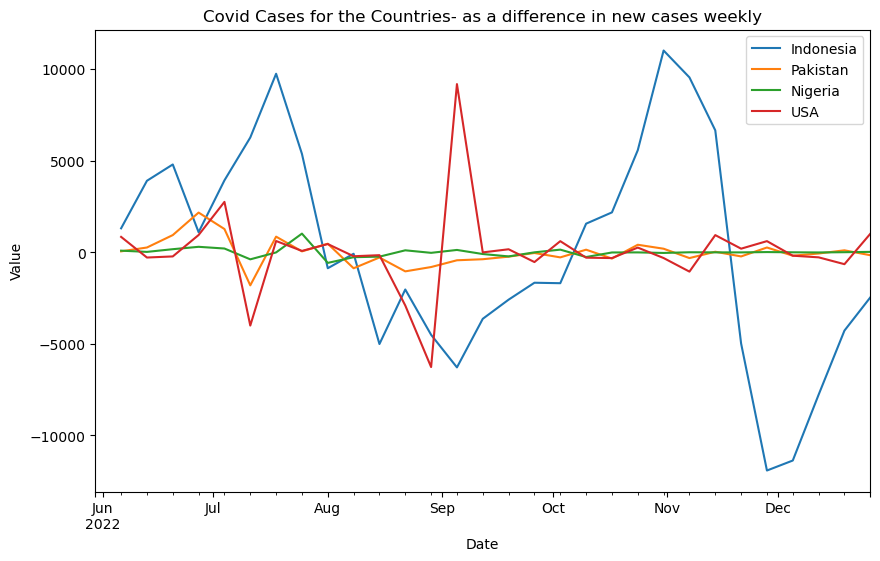

In [85]:
#PLOTTING DIFFERENCE IN NEW CASES WEEKLY

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean data as a line chart
CasesWorldNewResampledIDN.sum().diff().plot(kind='line', ax=ax ,label='Indonesia')
CasesWorldNewResampledPAK.sum().diff().plot(kind='line', ax=ax ,label='Pakistan' )
CasesWorldNewResampledNGA.sum().diff().plot(kind='line', ax=ax ,label='Nigeria')
cdnew_resampled.sum().diff().plot(kind='line', ax=ax ,label='USA')


ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Covid Cases for the Countries- as a difference in new cases weekly')


#ax.set_ylim(0, 1000)
# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()
#CasesWorldNewResampledNGA.sum().diff()

C:\Users\ashdh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


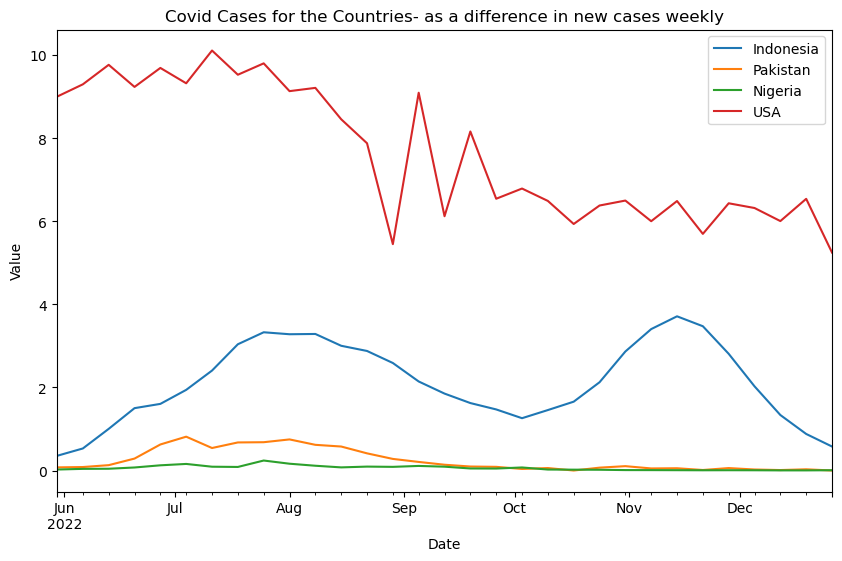

In [112]:
#PLOTTING THE LOG NORMALIZED VALUES
'''here we are adding the 1 before taking the log as to avoid logging a zero/ negative value. 
Its a very common practice done by mathematicians

Yes, it is ok if the log values plotted are not in between the range of 0 and 1. The purpose of taking log values is to reduce the scale of the data and make it easier to compare between countries. 
The actual values of the data are less important in this context, as the focus is on the trends and patterns in the data.
'''


'''NUMBER OF CASES'''
logNormalizeCasesIDN = np.log10(normalizeCasesIDN+1)
logNormalizeCasesPAK = np.log10(normalizeCasesPAK+1)
logNormalizeCasesNGA = np.log10(normalizeCasesNGA+1)
logNormalizeCasesUSA = np.log10(normalizeCasesUSA+1)


'''NUMBER OF DEATHS'''
logNormalizeDeathsIDN = np.log10(normalizeDeathsIDN+1)
logNormalizeDeathsPAK = np.log10(normalizeDeathsPAK+1)
logNormalizeDeathsNGA = np.log10(normalizeDeathsNGA+1)
logNormalizeDeathsUSA = np.log10(normalizeDeathsUSA+1)

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean data as a line chart
logNormalizeCasesIDN.resample('7D').sum().plot(kind='line', ax=ax ,label='Indonesia')
logNormalizeCasesPAK.resample('7D').sum().plot(kind='line', ax=ax ,label='Pakistan' )
logNormalizeCasesNGA.resample('7D').sum().plot(kind='line', ax=ax ,label='Nigeria')
logNormalizeCasesUSA.resample('7D').sum().plot(kind='line', ax=ax ,label='USA')

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Covid Cases for the Countries- as a difference in new cases weekly')


#ax.set_ylim(0, 1000)
# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


### Identify the peak weeks of the cases and deaths in US and other countries.

In [172]:

CasesWorldNewResampledIDN.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d")
int(CasesWorldNewResampledIDN.sum().sort_values(ascending = False).head(1)[0])

#FOR FINDING THE PEAK WEEKS FOR THE NUMBER OF CASES AND DEATHS

'''NUMBER OF CASES'''
print('\033[1m' +"The peaks weeks for the cases in the US and the other countries are:")
dict = {'Country' : ['USA', 'Indonesia', 'Pakistan', 'Nigeria'],
        'Date' : [ccnew_resampled.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d"),
                  CasesWorldNewResampledIDN.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d"),
                  CasesWorldNewResampledPAK.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d"),
                  CasesWorldNewResampledNGA.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d")],
        'cases' : [ccnew_resampled.sum().sort_values(ascending = False).head(1)[0],
                   int(CasesWorldNewResampledIDN.sum().sort_values(ascending = False).head(1)[0]),
                   int(CasesWorldNewResampledPAK.sum().sort_values(ascending = False).head(1)[0]),
                   int(CasesWorldNewResampledNGA.sum().sort_values(ascending = False).head(1)[0])]}


peakWeekCases = pd.DataFrame(dict)
display(peakWeekCases)

print("")

'''NUMBER OF DEATHS'''

print('\033[1m' +"The peaks weeks for the deaths in the US and the other countries are:")
dict = {'Country' : ['USA', 'Indonesia', 'Pakistan', 'Nigeria'],
        'Date' : [cdnew_resampled.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d"),
                  CasesWorldNewDeathsResampledIDN.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d"),
                  CasesWorldNewDeathsResampledPAK.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d"),
                  CasesWorldNewDeathsResampledNGA.sum().sort_values(ascending = False).head(1).index[0].strftime("%Y-%m-%d")],
        'cases' : [cdnew_resampled.sum().sort_values(ascending = False).head(1)[0],
                   int(CasesWorldNewDeathsResampledIDN.sum().sort_values(ascending = False).head(1)[0]),
                   int(CasesWorldNewDeathsResampledPAK.sum().sort_values(ascending = False).head(1)[0]),
                   int(CasesWorldNewDeathsResampledNGA.sum().sort_values(ascending = False).head(1)[0])]}


peakWeekCases = pd.DataFrame(dict)
display(peakWeekCases)


The peaks weeks for the cases in the US and the other countries are:


Country        Date   cases
0        USA  2022-07-25  789033
1  Indonesia  2022-11-14   46863
2   Pakistan  2022-07-04    5080
3    Nigeria  2022-07-25    1492


The peaks weeks for the deaths in the US and the other countries are:


Country        Date  cases
0        USA  2022-07-04   5225
1  Indonesia  2022-11-28    302
2   Pakistan  2022-08-15     27
3    Nigeria  2022-09-05      6